# Exploratory Data Analysis Starter

## Import packages

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [6]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [7]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.0


In [8]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [9]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13176 entries, 0 to 13175
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13176 non-null  object 
 1   channel_sales                   13176 non-null  object 
 2   cons_12m                        13176 non-null  int64  
 3   cons_gas_12m                    13176 non-null  int64  
 4   cons_last_month                 13176 non-null  int64  
 5   date_activ                      13176 non-null  object 
 6   date_end                        13176 non-null  object 
 7   date_modif_prod                 13176 non-null  object 
 8   date_renewal                    13176 non-null  object 
 9   forecast_cons_12m               13176 non-null  float64
 10  forecast_cons_year              13176 non-null  int64  
 11  forecast_discount_energy        13176 non-null  float64
 12  forecast_meter_rent_12m         

In [10]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55075 entries, 0 to 55074
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  55075 non-null  object 
 1   price_date          55075 non-null  object 
 2   price_off_peak_var  55075 non-null  float64
 3   price_peak_var      55075 non-null  float64
 4   price_mid_peak_var  55075 non-null  float64
 5   price_off_peak_fix  55075 non-null  float64
 6   price_peak_fix      55075 non-null  float64
 7   price_mid_peak_fix  55075 non-null  float64
dtypes: float64(6), object(2)
memory usage: 3.4+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [11]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.317600e+04,1.317600e+04,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13175.000000
mean,1.581110e+05,2.831332e+04,15957.649666,1869.876700,1404.044551,0.955449,63.041560,0.137251,0.050527,43.110399,153.185554,24.497176,24.494290,1.296220,188.949394,4.999621,18.142888,0.097381
std,5.688449e+05,1.640186e+05,63808.181936,2426.782796,3317.831628,5.083088,66.143961,0.024762,0.049043,4.564279,348.506528,20.161878,20.160876,0.724253,320.077511,1.611416,13.597703,0.296488
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.634750e+03,0.000000e+00,0.000000,491.157500,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.100000,14.100000,1.000000,50.317500,4.000000,12.500000,0.000000
50%,1.410350e+04,0.000000e+00,791.500000,1106.395000,311.000000,0.000000,18.820000,0.143166,0.084066,44.311378,37.100000,21.640000,21.640000,1.000000,111.920000,5.000000,13.856000,0.000000
75%,4.080400e+04,0.000000e+00,3390.500000,2386.262500,1725.250000,0.000000,131.020000,0.146348,0.098837,44.311378,193.742500,29.850000,29.850000,1.000000,240.982500,6.000000,19.050000,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [12]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,55075.000000,55075.000000,55075.000000,55075.000000,55075.000000,55075.000000
mean,0.140722,0.054705,0.031543,43.333877,10.947773,6.627781
std,0.024472,0.050155,0.036518,5.205739,12.876561,7.819805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125748,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.145509,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151367,0.102232,0.072846,44.444710,24.339581,16.226389
max,0.280700,0.169536,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations.

In [13]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:

        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

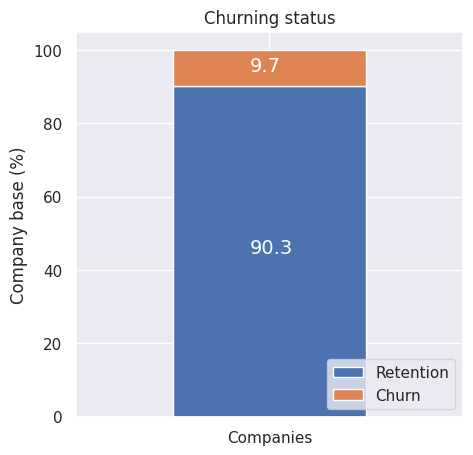

In [14]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

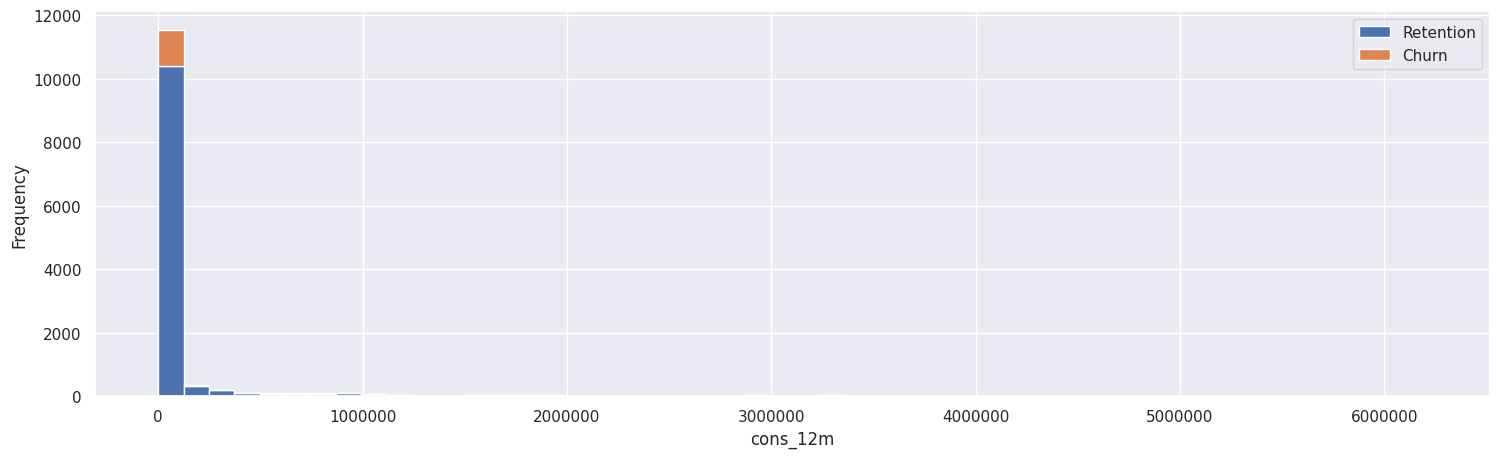

In [15]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

In [16]:
# Convert price_date and date_activ to datetime type
price_df['price_date'] = pd.to_datetime(price_df['price_date'])
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'])

# Merge client_df and price_df
df = pd.merge(client_df, price_df, on='id')

# Make sure the data is sorted by date for each client
df.sort_values(['id', 'price_date'], inplace=True)


In [17]:
# Calculate price change for each month for each client
df['price_change'] = df.groupby('id')['price_off_peak_var'].diff()


In [18]:
# Calculate correlation between price_change and churn
correlation = df['price_change'].corr(df['churn'])
print(f'Correlation between price change and churn: {correlation}')


Correlation between price change and churn: -0.005548690666525707


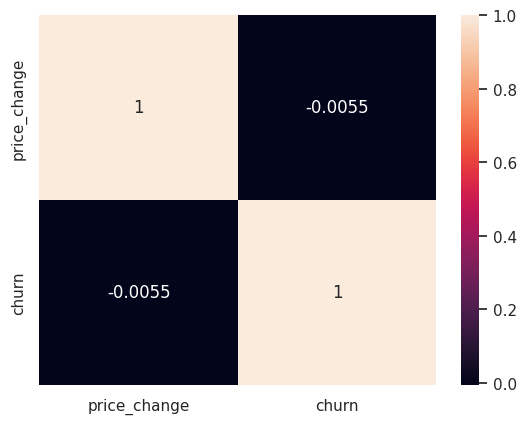

In [19]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df[['price_change', 'churn']].corr()

# Plot heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Remove rows with missing values in price_change
df = df.dropna(subset=['price_change'])

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df[['price_change']], df['churn'], test_size=0.2, random_state=42)

# Create logistic regression model
model = LogisticRegression()

# Train model
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      7424
         1.0       0.00      0.00      0.00       849

    accuracy                           0.90      8273
   macro avg       0.45      0.50      0.47      8273
weighted avg       0.81      0.90      0.85      8273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from xgboost import XGBClassifier



# Define preprocessing pipelines for both numerical and categorical data
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the model
model = RandomForestClassifier(random_state=42)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

# Preprocessing of training data, fit model
my_pipeline.fit(X_train, y_train)

# Preprocessing of test data, get predictions
y_pred = my_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1)

# Calculate the scale_pos_weight value
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Define the XGBoost model with scale_pos_weight
model_xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = model_xgb.predict(X_test)

# Calculate the evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print the evaluation metrics
print("XGBoost Accuracy: ", accuracy_xgb)
print("XGBoost Recall: ", recall_xgb)
print("XGBoost Precision: ", precision_xgb)
print("XGBoost F1 Score: ", f1_xgb)

Accuracy:  0.8949595068294451
Recall:  0.004711425206124852
Precision:  0.14285714285714285
F1 Score:  0.00912200684150513


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy:  0.8364559410129336
XGBoost Recall:  0.0895170789163722
XGBoost Precision:  0.11585365853658537
XGBoost F1 Score:  0.10099667774086378


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, recall, precision, f1


(0.8949595068294451,
 0.004711425206124852,
 0.14285714285714285,
 0.00912200684150513)